# Task 1 (3 points)

Generate a toy dataset for the "XOR" problem:

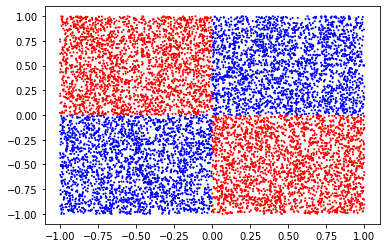

i.e. where the two features are distributed **uniformly** in $[-1, 1]$, and the target is $y = (x_0 >= 0) \text{ XOR } (x_1 >= 0)$.

Let the total number of points in the dataset be $N=10000$.

Fit a `sklearn.tree.DecisionTreeClassifier` on this data. Find a minimal `max_depth` value that results in train accuracy $>0.99$.

For each value of `max_depth` from 1 to the value found above, plot the data with the decision boundary for the obtained model. (*Hint: use `s=1` argument to `plt.scatter` to be able to see anything behind the data points.*)

For the model with train accuracy $>0.99$ use `sklearn.tree.plot_tree` to observe the tree structure.

 When the depth =  1  The accuracy is  0.5136
 When the depth =  2  The accuracy is  0.5265
 When the depth =  3  The accuracy is  0.5629
 When the depth =  4  The accuracy is  0.971
 When the depth =  5  The accuracy is  1.0
 The minimum depth =  5  And the accuracy is  1.0


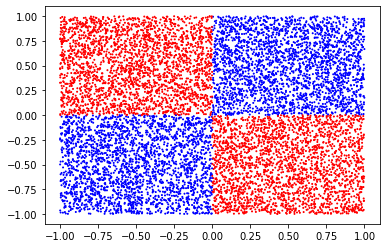

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

np.random.seed(1)
num_points = 10000
X = np.zeros((num_points, 2)) 
X[:,0] = np.random.uniform(-1,1, num_points)
X[:,1]= np.random.uniform(-1,1, num_points)
y = []

for i in range(len(X)) :
  if (X[i,0] >= 0) and (X[i,1] >=0):
    y.append(0)
  elif (X[i,0] <0) and (X[i,1] <0):
      y.append(0) 
  else:
      y.append(1)

# visualize the points:
colormap = np.array(['b', 'r'])
plt.scatter(X[:,0],X[:,1],s =1, c=colormap[y])

for i in range(1,40):
  clf =DecisionTreeClassifier(max_depth= i)
  clf = clf.fit(X, y)
  y_pred = clf.predict(X)
  acc =accuracy_score(y, y_pred)
  print(" When the depth = ", i , " The accuracy is " ,acc )
  if acc > 0.99:
    min_dipth = i
    break
print(" The minimum depth = ", i , " And the accuracy is " ,acc )      





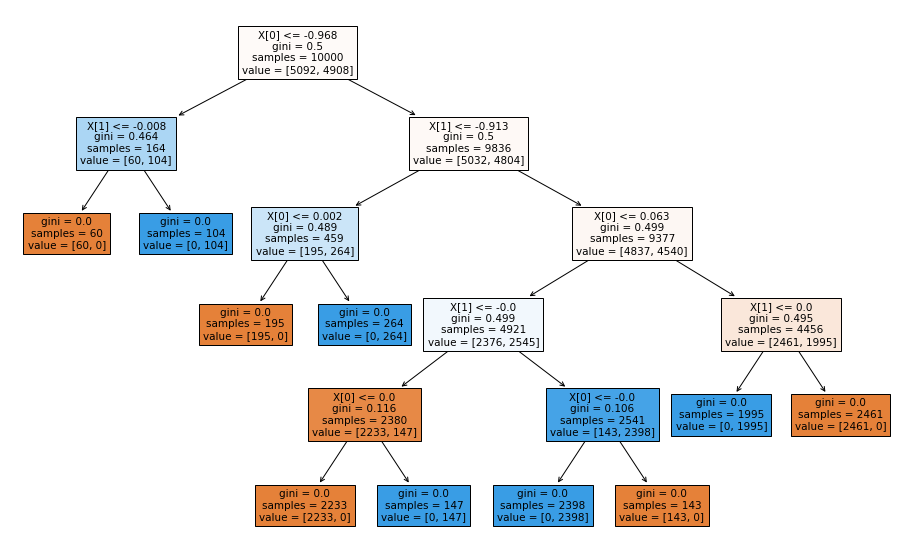

In [3]:
fig = plt.figure(figsize=(16,10))
_ = plot_tree(clf, filled=True)
plt.show()

In [27]:
def plot_decision_boundary(pred_func):
# Set min and max values and give it some padding
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  h = 0.01
  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Predict the function value for the whole gid
  Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  # Plot the contour and training examples
  plt.contourf(xx, yy, Z, cmap=plt.cm.plasma)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.plasma)
  # Plot the decision boundary


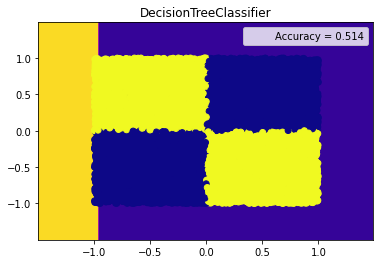

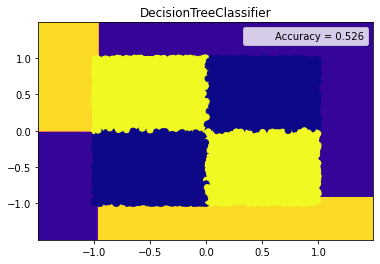

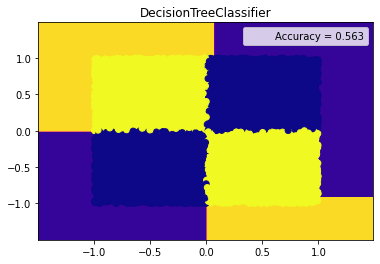

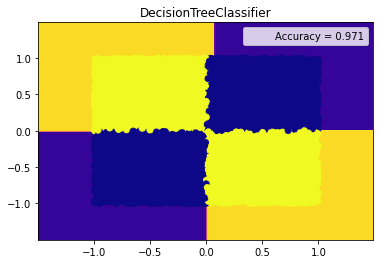

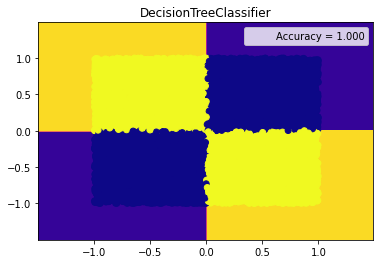

In [28]:
for i in range(1, min_dipth+1):
  plt.figure()
  clf =DecisionTreeClassifier(max_depth= i)
  clf = clf.fit(X, y)
  plot_decision_boundary(lambda X: clf.predict(X))
  plt.title("DecisionTreeClassifier")
  y_pred = clf.predict(X)
  plt.plot([], [], ' ',
             label='Accuracy = {:.3f}'.format(accuracy_score(y, y_pred)))
    
  plt.legend(loc='best')




# Task 2 (3 points)

Consider the following dataset:

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
#print(data.DESCR)

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

print(type(y_train))


<class 'numpy.ndarray'>


In [56]:
print(X_train.iloc[:5])
print(y_train[:5])

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
375       16.170         16.07  ...          0.3153                  0.08960
416        9.405         21.70  ...          0.2872                  0.08304
530       11.750         17.56  ...          0.2478                  0.07757
363       16.500         18.29  ...          0.2394                  0.06469
435       13.980         19.62  ...          0.3179                  0.10550

[5 rows x 30 columns]
['benign' 'benign' 'benign' 'benign' 'malignant']


Build a `sklearn.tree.DecisionTreeClassifier` to maximize the test ROC AUC score.

When predicting cancer, it's much more dangerous to have a false negative prediction rather than false positive. Try to find the best tree (in terms of test ROC AUC) where the labels are re-weighted with the `class_weight={'malignant' : 2., 'benign' : 1.}` argument provided to the `DecisionTreeClassifier` constructor.

Plot test ROC curves for the two best models you found on the same plot.

In [126]:
y_train = [ 2. if x == 'malignant' else 1. for x in y_train ]
y_test = [ 2. if x == 'malignant' else 1. for x in y_test ]

In [ ]:
   if max_roc < roc_auc_score(y_test,y_score):
      max_roc = roc_auc_score(y_test,y_score)
      index = i

Depth: 1
Training Accuracy: 0.93
Testing Accuracy: 0.89
ROC AUC Accuracy: 0.86

Depth: 2
Training Accuracy: 0.96
Testing Accuracy: 0.90
ROC AUC Accuracy: 0.93

Depth: 3
Training Accuracy: 0.98
Testing Accuracy: 0.92
ROC AUC Accuracy: 0.94

Depth: 4
Training Accuracy: 0.99
Testing Accuracy: 0.93
ROC AUC Accuracy: 0.92

Depth: 5
Training Accuracy: 1.00
Testing Accuracy: 0.92
ROC AUC Accuracy: 0.92

Depth: 6
Training Accuracy: 1.00
Testing Accuracy: 0.88
ROC AUC Accuracy: 0.88

Depth: 7
Training Accuracy: 1.00
Testing Accuracy: 0.88
ROC AUC Accuracy: 0.88

Depth: 8
Training Accuracy: 1.00
Testing Accuracy: 0.88
ROC AUC Accuracy: 0.88

Depth: 9
Training Accuracy: 1.00
Testing Accuracy: 0.88
ROC AUC Accuracy: 0.88


The best ROC AUC is 0.9377664109121908 with tree depth: 3
The second best ROC AUC is 0.9281756180733163 with tree depth: 2


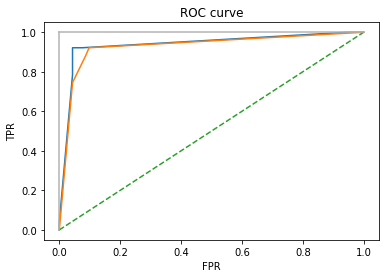

In [215]:
max_depth = 10
max_acc = 0
roc_values = []

for i in range(1,max_depth):
    tree = DecisionTreeClassifier(max_depth=i, random_state= 42)
    tree.fit(X_train, y_train)
    y_score = tree.predict_proba(X_test)[:, 1]
    y_pred = tree.predict(X_test)
    print("Depth: {0}".format(i))
    print("Training Accuracy: {0:.2f}".format(tree.score(X_train, y_train)))
    print("Testing Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))
    roc = roc_auc_score(y_test,y_score)
    print("ROC AUC Accuracy: {0:.2f}".format(roc))
    print()
    roc_values.append(roc)

# to store depth  = (index) + 1 
roc1 = max(roc_values)
index1 = roc_values.index(roc1) + 1
roc_values.remove(roc1)
roc2 = max(roc_values)
index2 = roc_values.index(roc2) + 1
# I remove item so I add 1 if index2 >= index1
if index2 >= index1:
  index2 = index2 + 1


print()
print("The best ROC AUC is", roc1, "with tree depth:" , index1)
print("The second best ROC AUC is", roc2, "with tree depth:" , index2)

tree1 = DecisionTreeClassifier(max_depth=index1,random_state = 42)
tree2 = DecisionTreeClassifier(max_depth=index2,random_state = 42)

tree1.fit(X_train, y_train)
tree2.fit(X_train, y_train)

y_score1 = tree1.predict_proba(X_test)[:, 1] 
y_score2 = tree2.predict_proba(X_test)[:, 1] 

fpr1, tpr1, _ = roc_curve(y_test,y_score1,pos_label=2) 
fpr2, tpr2, _ = roc_curve(y_test,y_score2,pos_label=2) 

plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print()
